# Boston Housing
- Main text Figure 9. GPR-based Variance-Based c-SHAPs for the Boston Housing dataset.
- Supplementary materials Figure B.1 : Estimates of Variance-Based c-SHAPs for the Boston Housing dataset.

This code is implemented on Google Colab.
For detailed installation instructions for Python package `cohortshapley`, we refer to the repository at https://github.com/cohortshapley/cohortshapley.

In [ ]:
# Install Python package cohortshapley
# Clone the repository
!git clone https://github.com/cohortshapley/cohortshapley.git

# Install it using pip (editable mode only works if setup.py is present)
!pip install ./cohortshapley

Cloning into 'cohortshapley'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 63 (delta 27), reused 52 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 1.87 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Processing ./cohortshapley
  Preparing metadata (setup.py) ... done
  Created wheel for cohortshapley: filename=cohortshapley-0.1.0-py3-none-any.whl size=11867 sha256=3af6095461f6a40e67897c8ac8d3bf58da2f224d03c1c24aae5f3159d55b3135
  Stored in directory: /tmp/pip-ephem-wheel-cache-co05_xgg/wheels/0a/e9/56/2024084b16ad3347d4f0e085cd34e883315bef68989aeb442f
Successfully built cohortshapley


In [ ]:
# import python packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time

from cohortshapley import dataset
from cohortshapley import realistic
from cohortshapley import sampling
from cohortshapley import similarity
from cohortshapley import baselineshapley as bs
from cohortshapley import cohortshapley as cs
from cohortshapley import similarity
from cohortshapley import figure
from cohortshapley import varianceshapley as vs

In [ ]:
# import dataset
X = pd.read_csv('./BostonHousingX.csv', header=None)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X.columns = column_names

# raw output
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
Y = raw_df.values[1::2, 2]
# machine learning output
Ypred = pd.read_csv('./BostonHousing_bestmodelpred_XgbGprRf.csv', header=0)

--- 17.93681240081787 seconds ---
[ 3.44711315  3.65255893  4.98045695  2.13219577  8.07998637 15.36472957
  4.99052266  3.73095234  4.98817421  4.14116767  6.71430181  3.14568295
 18.77379876]


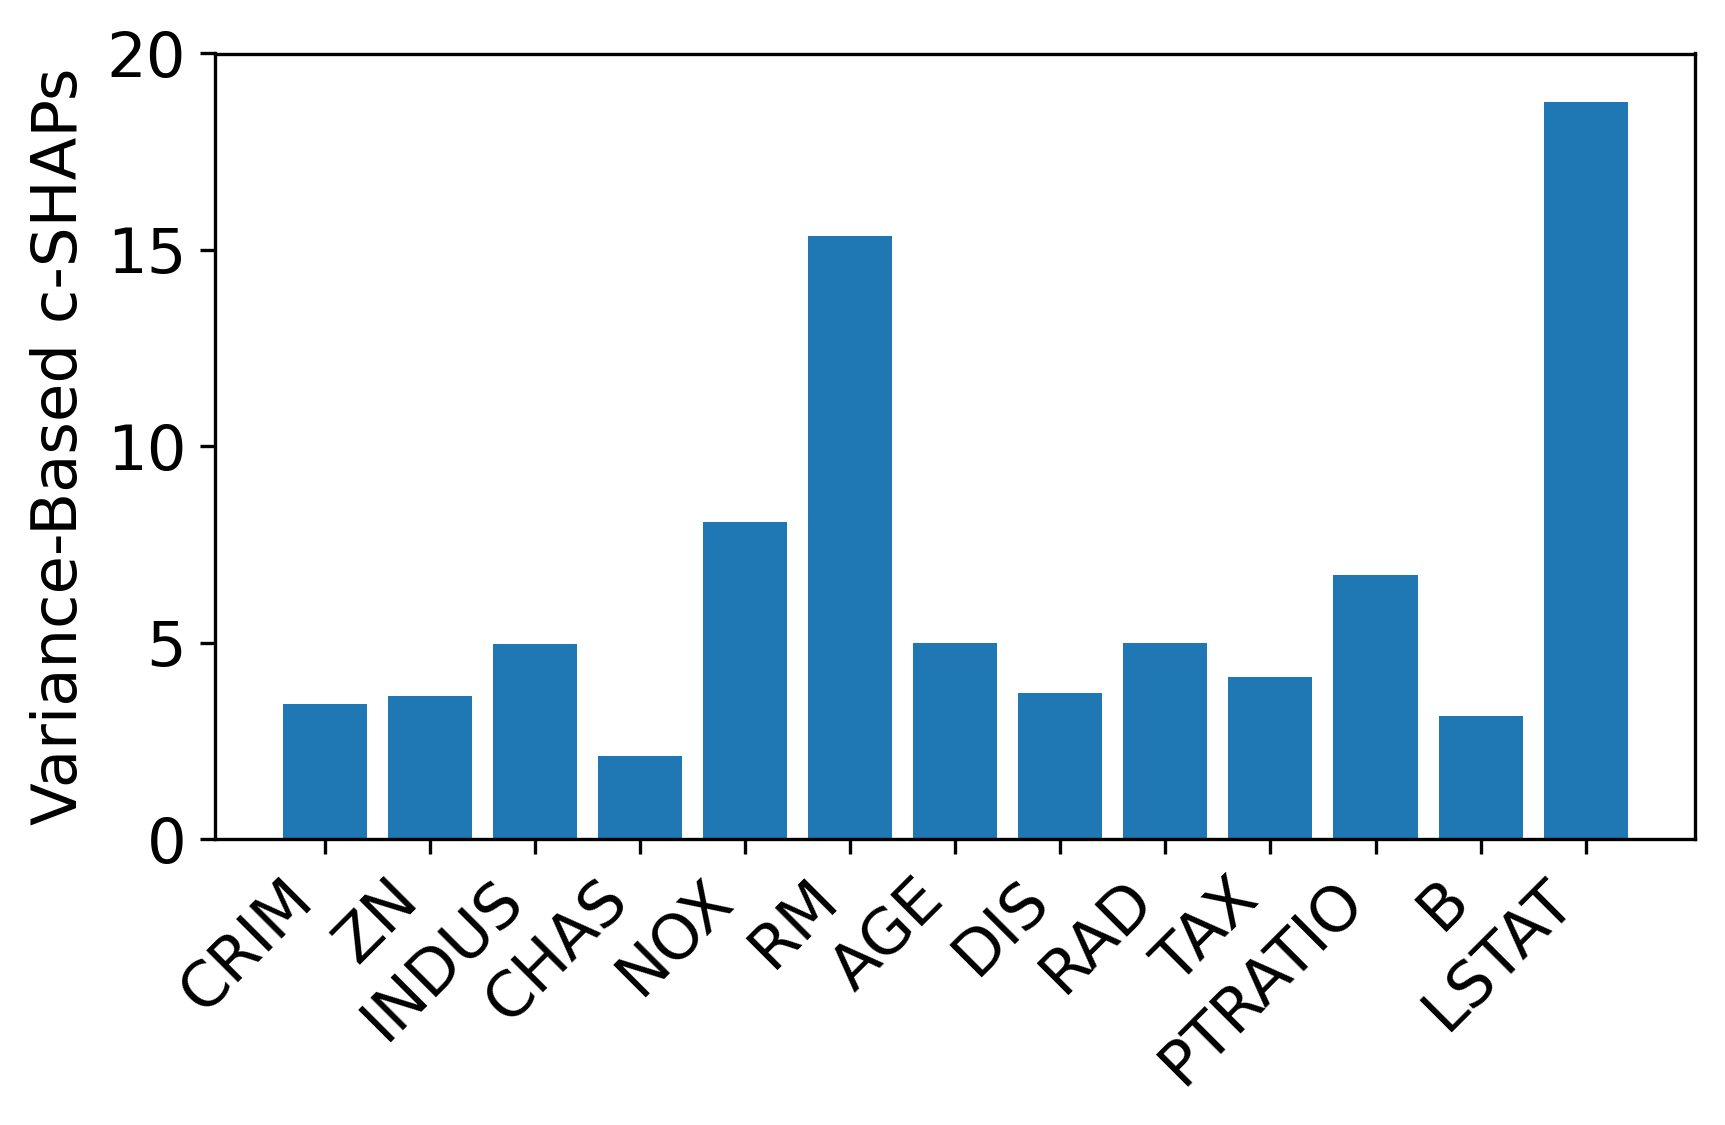

In [ ]:
# Calculate VarianceShapley with real observations
nbins = 10
start_time = time.time()
bins_result = similarity.binning(X.values,bins = nbins)
vs_values = vs.VarianceShapley(Y, bins_result[0])  #model(X)
print("--- %s seconds ---" % (time.time() - start_time))s
print(vs_values)

fig=plt.figure(figsize=(6, 4),dpi=300)
plt.rcParams["font.size"] = 15
plt.bar(column_names,vs_values)
plt.ylabel('Variance-Based c-SHAPs')
plt.ylim(0, 20)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

## Variance Shapley - XGBoost

--- 25.296108961105347 seconds ---
[ 3.44693228  3.65234192  4.97969432  2.1326979   8.07805131 15.35969582
  4.98776836  3.73029105  4.98663463  4.14046169  6.7131495   3.14478289
 18.77166967]


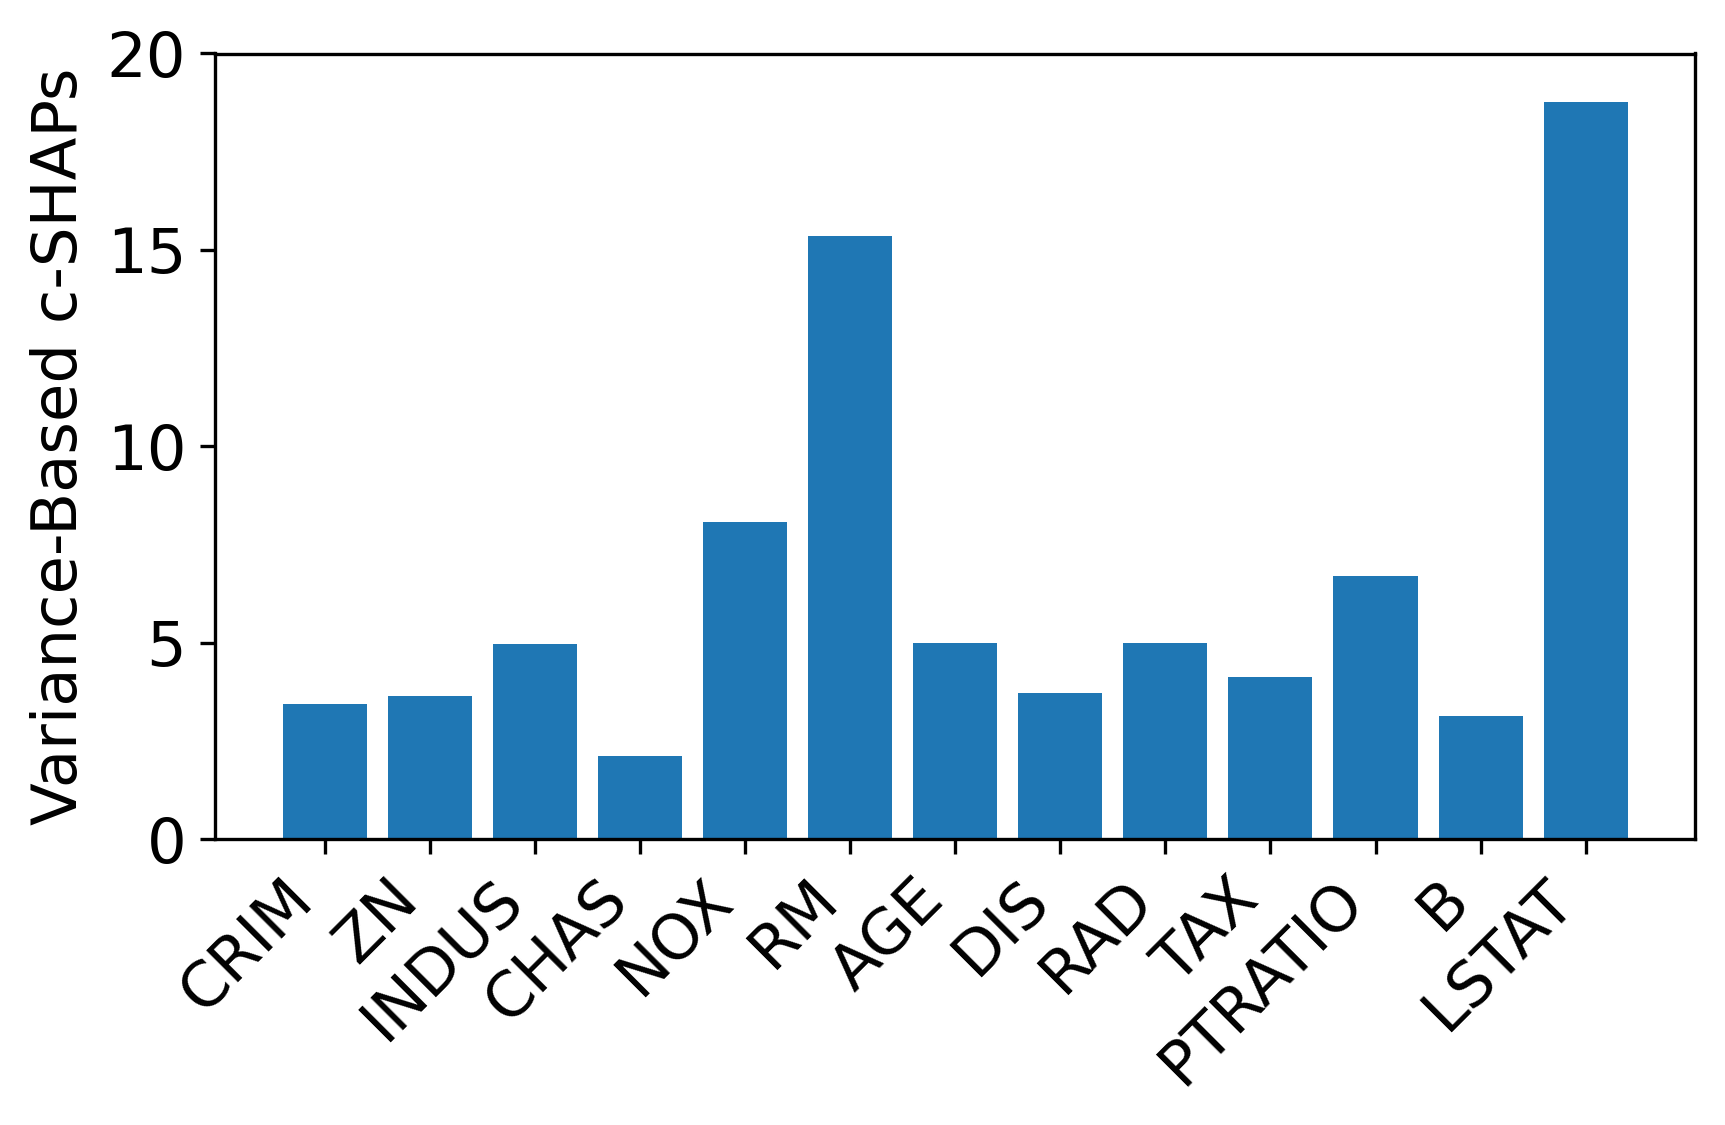

In [ ]:
# Calculate VarianceShapley with predictions
nbins = 10
start_time = time.time()
bins_result = similarity.binning(X.values,bins = nbins)
vs_values = vs.VarianceShapley(Ypred['Yxgboost'], bins_result[0])  #model(X)
print("--- %s seconds ---" % (time.time() - start_time))
print(vs_values)


fig=plt.figure(figsize=(6, 4),dpi=300)
plt.rcParams["font.size"] = 15
plt.bar(column_names,vs_values)
plt.ylabel('Variance-Based c-SHAPs')
plt.ylim(0, 20)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

## Variance Shapley - gpr

In [ ]:
# Calculate VarianceShapley with predictions
nbins = 10
start_time = time.time()
bins_result = similarity.binning(X.values,bins = nbins)
vs_values = vs.VarianceShapley(Ypred['Ygpr'], bins_result[0])  #Ygpr, Ysvm
print("--- %s seconds ---" % (time.time() - start_time))
print(vs_values)

--- 25.439926862716675 seconds ---
[ 3.42018747  3.55364907  4.73092796  2.13346888  7.62656792 14.86540108
  4.41032423  3.41815292  4.74101021  3.96726763  6.45609672  2.72046276
 17.95211404]


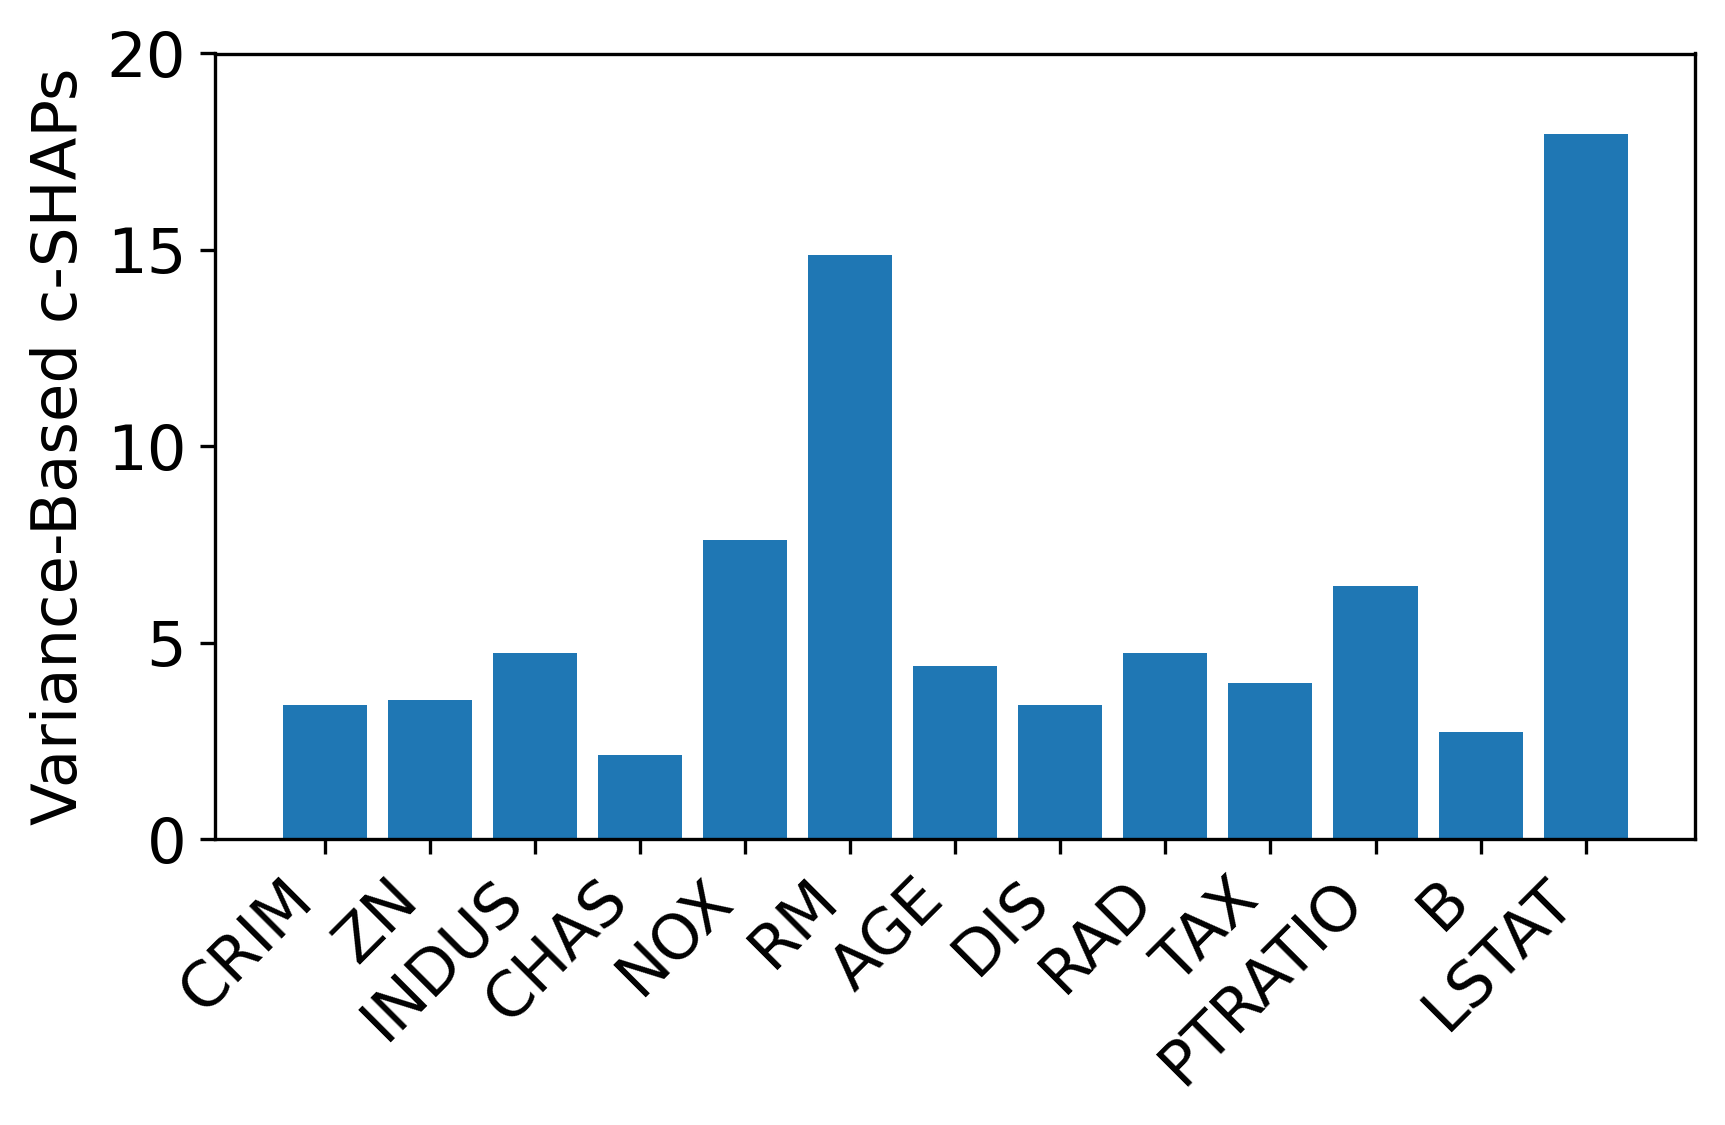

In [ ]:
fig=plt.figure(figsize=(6, 4),dpi=300)
plt.rcParams["font.size"] = 15
plt.bar(column_names,vs_values)
plt.ylabel('Variance-Based c-SHAPs')
plt.ylim(0, 20)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

## Variance Shapley - rf

--- 26.174821853637695 seconds ---
[ 2.50511443  3.19433656  4.44547479  1.343938    5.59822722 12.31353208
  3.68874674  2.94810319  4.307557    3.54575239  5.73337046  1.98261328
 13.81613394]


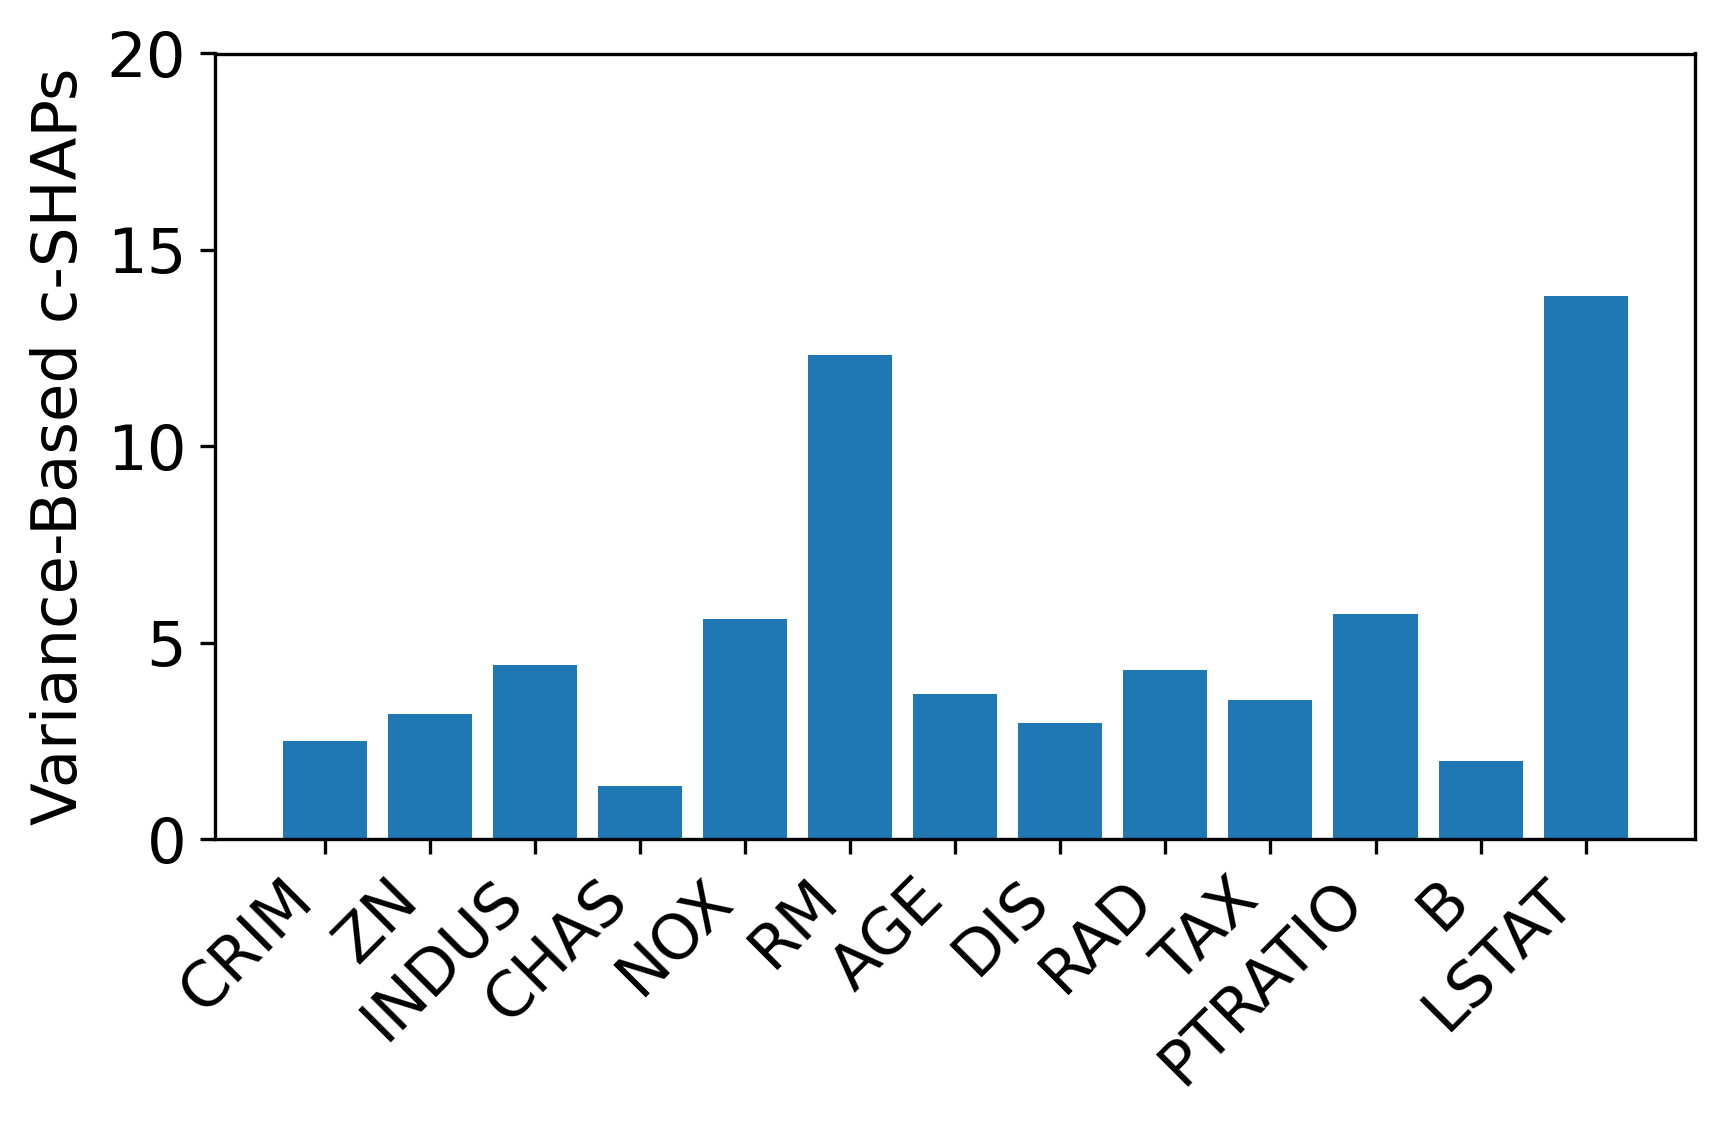

In [ ]:
# Calculate VarianceShapley with predictions
nbins = 10
start_time = time.time()
bins_result = similarity.binning(X.values,bins = nbins)
vs_values = vs.VarianceShapley(Ypred['Yrf'], bins_result[0])  #Ygpr, Ysvm
print("--- %s seconds ---" % (time.time() - start_time))
print(vs_values)

fig=plt.figure(figsize=(6, 4),dpi=300)
plt.rcParams["font.size"] = 15
plt.bar(column_names,vs_values)
plt.ylabel('Variance-Based c-SHAPs')
plt.ylim(0, 20)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()